## Name : sandy adel latef beshay
## ID : 300389917

In [1]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from skimage import io, color, transform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

# 1.1 Getting Started

In [2]:
#define data location
direct = "C:/Users/FiX-DEll/Downloads/English/Img/GoodImg/Bmp"
digts = {
    '4': 'Sample005',
    'A': 'Sample011',
    'H': 'Sample018',
    'u': 'Sample057',
}

#load and preprocess the data
data = []
labels = []

for digit, sub_direct in digts.items():
    digit_direct = os.path.join(direct,sub_direct)
    filenames = os.listdir(digit_direct)

    for filename in filenames:
        file_path = os.path.join(digit_direct, filename)
        file = io.imread(file_path)
        fie = color.rgb2gray(file)
        file = transform.resize(file, (32, 32), mode='constant', anti_aliasing=True)
        data.append(file)
        labels.append(digit)

#load the images into numpy matrices
data = np.array(data)
labels = np.array(labels)

In [3]:
# Define a function to draw a confusion metrics
def plot_confusion_matrix(cm, classes, title):
    sns.heatmap(cm, fmt='g', annot=True, cmap='Greens')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks + 0.5, classes)
    plt.yticks(tick_marks + 0.5, classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

In [4]:
# Define a function to calculate metrics
def calculate_metrics(confusion_matrix):
    TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]

    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Calculate recall (Sensitivity)
    recall = TP / (TP + FN)

    # Calculate precision
    precision = TP / (TP + FP)

    # Calculate F1 score
    f1_score = 2 * (precision * recall) / (precision + recall)

    return accuracy, recall, precision, f1_score

# 1.2 Binary Classifiers

In [5]:
#merge the data for (4,A)
data_4_A=[]
labels_4_A=[]
for i , label in enumerate(labels):
    if (label=='A' or label=='4'):
        data_4_A.append(data[i])
        labels_4_A.append(labels[i])
        
data_4_A=np.array(data_4_A) 
labels_4_A=np.array(labels_4_A)

In [6]:
#split the data to (train,val,test)
X_train, X_temp, y_train, y_temp = train_test_split(data_4_A, labels_4_A, test_size=0.4, stratify=labels_4_A)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

#reshape the data
X_train = X_train.reshape(len(X_train),-1)
X_val = X_val.reshape(len(X_val), -1)
X_test = X_test.reshape(len(X_test), -1)

#train the data
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Define class labels
class_labels = ['4', 'A']

In [7]:
#split the data manual for (train,val,test) as (40%,30%,30%)
print("Number of training data:", len(X_train))
print("Number of validation data:", len(X_val))
print("Number of test dat:", len(X_test))

Number of training data: 363
Number of validation data: 121
Number of test dat: 121


Training Data Metrics:
Accuracy: 0.99
Recall: 1.00
Precision: 0.99
Confusion Matrix:
[[ 26   2]
 [  0 335]]


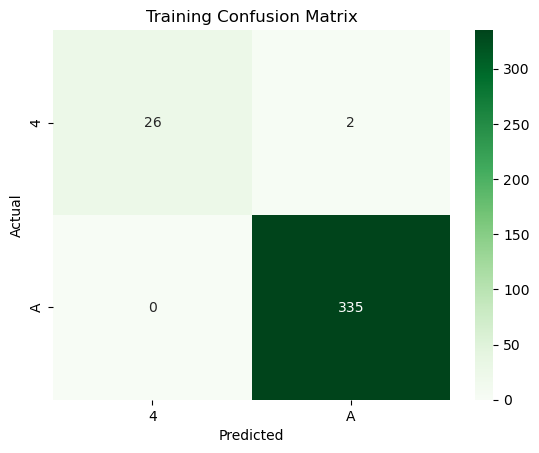

In [8]:
# Calculate confusion matrix for training data
confusion_matrix_train = confusion_matrix(y_train, clf.predict(X_train))

# Calculate metrics for training data
accuracy_train, recall_train, precision_train, f1_train = calculate_metrics(confusion_matrix_train)

# Print metrics for training data
print("Training Data Metrics:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix_train}")

# Plot confusion matrix for training data
plot_confusion_matrix(confusion_matrix_train, classes=class_labels, title='Training Confusion Matrix')


Testing Data Metrics:
Accuracy: 0.95
Recall: 1.00
Precision: 0.95
Confusion Matrix:
[[  3   6]
 [  0 112]]


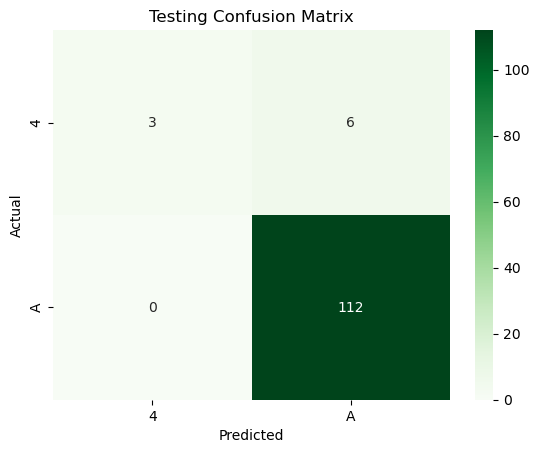

In [9]:
# Calculate confusion matrix for testing data
confusion_matrix_test = confusion_matrix(y_test, clf.predict(X_test))

# Calculate metrics for testing data
accuracy_test, recall_test, precision_test, f1_test = calculate_metrics(confusion_matrix_test)

# Print metrics for testing data
print("\nTesting Data Metrics:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix_test}")

# Plot confusion matrix for testing data
plot_confusion_matrix(confusion_matrix_test, classes=class_labels, title='Testing Confusion Matrix')


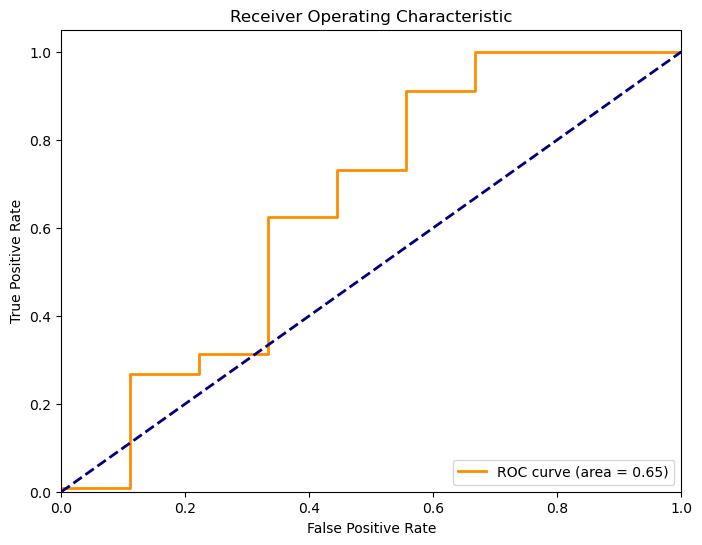

In [10]:
# Predicted probabilities of being in class 1 ('A') for the testing data
y_test_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob, pos_label='A')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### explanation of the results

There is a class imbalance issue within our dataset, which means that certain classes have significantly fewer instances than others. To address this imbalance, I opted to use a stratified sampling technique. Stratification ensures that the distribution of classes in our training and testing sets reflects the original class distribution in the data.

Upon analyzing the confusion matrix of our classifier, I observed signs of overfitting. Overfitting occurs when the model performs exceptionally well on the training data but struggles to generalize to unseen data. In our case, the model seems to have learned the training data too well, which might not be representative of the broader dataset.

Based on these findings, I am beginning to question the suitability of this classifier for our dataset. It's possible that the model's complexity or the choice of algorithm may not be appropriate given the characteristics of our data. Further investigation and potentially reevaluating our modeling approach might be necessary to improve the model's performance.

# 1.3 Multiclass Classifier

In [11]:
#split the data to (train,val,test)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.4, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

#reshape the data
X_train = X_train.reshape(len(X_train),-1)
X_val = X_val.reshape(len(X_val), -1)
X_test = X_test.reshape(len(X_test), -1)

#train the data
clf = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
clf.fit(X_train, y_train)

# Define class labels
class_labels = ['4', 'A','H','u']

In [12]:
#split the data manual for (train,val,test) as (40%,30%,30%)
print("Number of training data:", len(X_train))
print("Number of validation data:", len(X_val))
print("Number of test dat:", len(X_test))

Number of training data: 503
Number of validation data: 168
Number of test dat: 168


Training Data Metrics:
Accuracy: 1.00
Average Recall: 1.00
Average Precision: 1.00
F1 Score: 1.00
Confusion Matrix:
[[ 28   0   0   0]
 [  0 333   1   0]
 [  0  13 103   0]
 [  0   2   0  23]]


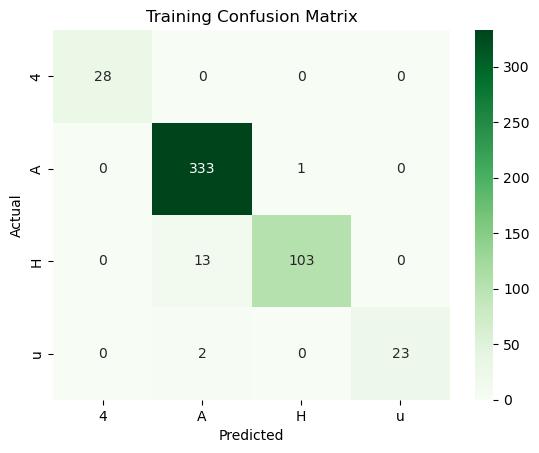

In [13]:
# Calculate confusion matrix for training data
confusion_matrix_train = confusion_matrix(y_train, clf.predict(X_train))

# Calculate metrics for training data
accuracy_train, recall_train, precision_train, f1_train = calculate_metrics(confusion_matrix_train)

# Print metrics for training and testing data
print("Training Data Metrics:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Average Recall: {recall_train:.2f}")
print(f"Average Precision: {precision_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix_train}")

# Plot confusion matrix for training data
plot_confusion_matrix(confusion_matrix_train, classes=class_labels, title='Training Confusion Matrix')


Testing Data Metrics:
Accuracy: 0.99
Average Recall: 0.99
Average Precision: 1.00
F1 Score: 0.99
Confusion Matrix:
[[ 7  0  3  0]
 [ 1 95 13  3]
 [ 0 24 14  0]
 [ 0  3  1  4]]


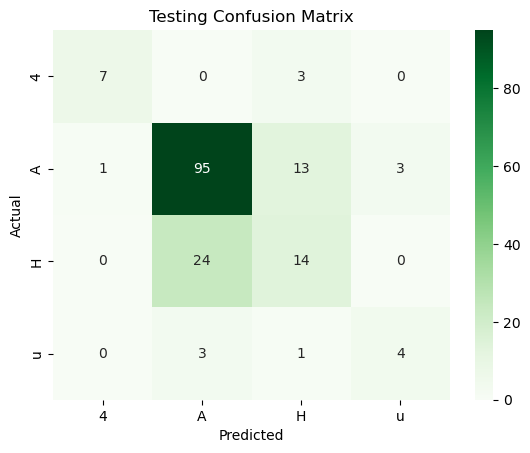

In [14]:
# Calculate confusion matrix for testing data
confusion_matrix_test = confusion_matrix(y_test, clf.predict(X_test))

# Calculate metrics for testing data
accuracy_test, recall_test, precision_test, f1_test = calculate_metrics(confusion_matrix_test)

print("\nTesting Data Metrics:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Average Recall: {recall_test:.2f}")
print(f"Average Precision: {precision_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix_test}")

# Plot confusion matrix for testing data
plot_confusion_matrix(confusion_matrix_test, classes=class_labels, title='Testing Confusion Matrix')

### classifier's performance

The classifier's overall performance on the task is highly impressive, with an accuracy of 0.99, an average recall of 0.99, an average precision of 1.00, and an F1 score of 0.99. This indicates its ability to correctly classify most instances. 

However, when examining individual classes in confusion matrix, some variations in performance become evident, these variation in individual accuracies due to the imblanced classes volume, ex:
- Class '4' is fairly well classified, with a good recall.
- Class 'A' is the easiest to classify, with a high recall and perfect precision.
- Class 'H' exhibits good precision but a lower recall, indicating some instances are missed.
- Class 'u' is the most challenging, with both recall and precision at less than 0.60, suggesting difficulty in correctly identifying and distinguishing 'u' instances.

Additionally, there appears to be some confusion between classes 'A' and 'H'. In summary, while the classifier performs exceptionally well overall, there are variations in its ability to classify individual classes, and addressing the challenges associated with classes 'H' and 'u' may be a priority for further improvement.